# Daily-Dose-of-Data-Science

[Daily Dose of Data Science](https://avichawla.substack.com) is a publication on Substack that brings together intriguing frameworks, libraries, technologies, and tips that make the life cycle of a Data Science project effortless. 

Author: Avi Chawla

[Medium](https://medium.com/@avi_chawla) | [LinkedIn](https://www.linkedin.com/in/avi-chawla/)

# An Overly Simplified Guide To Understanding How Neural Networks Transform Data

Post Link: [Substack]()

LinkedIn Post: [LinkedIn]()

Twitter Post: [Twitter]()

In [2]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import seaborn as sns

from sklearn.datasets import make_circles

sns.set()

In [7]:
plt.rcParams['font.family'] = ['Times New Roman', 'sans-serif']


In [212]:
df = pd.read_csv("../_Datasets/n_arm_spiral.csv", sep=";", names = ["X1", "X2", "Y"])

In [213]:
colors = ['#fe7c73', '#2471A3', '#3498DB', '#27AE60', '#82E0AA', '#D35400', '#5D6D7E', '#E74C3C', '#21618C', '#B7950B', '#46C7C7', '#00B9FF', '#FF7051', "orange", "darkorange", "tomato", "coral", "limegreen", "lightsalmon"]


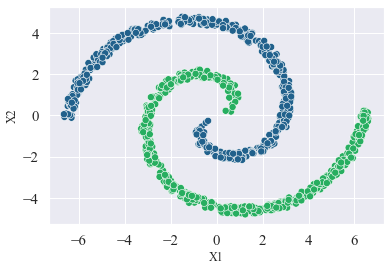

In [214]:
selected = [colors[3], colors[8], colors[14]]

sns.scatterplot(df.X1, df.X2, s = 50, c=[selected[label] for label in df["Y"]])
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

In [215]:
X = df[["X1","X2"]].values
y = df.Y.values

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)

x_min, x_max = float(X[:, 0].min()), float(X[:, 0].max())
y_min, y_max = float(X[:, 1].min()), float(X[:, 1].max())

X[:, 0] = (X[:, 0] - x_min)/(x_max-x_min)
X[:, 1] = (X[:, 1] - y_min)/(y_max-y_min)

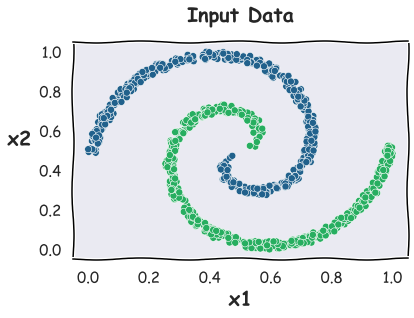

In [239]:
selected = [colors[3], colors[8], colors[14]]

with plt.xkcd():
    sns.scatterplot(X[:, 0], X[:, 1], s = 50, c=[selected[label] for label in df["Y"]])
    plt.xlabel("x1", fontweight = "bold", size = 20)
    plt.xticks(size = 15)
    plt.ylabel("x2", fontweight = "bold", size = 20, rotation = 0, labelpad=20)
    plt.yticks(size = 15)
    plt.title("Input Data", fontweight = "bold", size = 20, pad =20)
    plt.show()

In [217]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, classes=3):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, 2)
        self.fc4 = nn.Linear(2, classes)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = torch.sigmoid(self.fc4(x))
        return x
    
def accuracy(outputs, labels):
    return int(torch.sum(torch.argmax(outputs, axis = 1) == y))/len(outputs)

epoch = 0, acc =0.5
epoch = 50, acc =0.834
epoch = 100, acc =0.997
epoch = 150, acc =0.999
epoch = 200, acc =1.0
epoch = 250, acc =1.0


Text(0.5, 1.0, 'Tranformed Data')

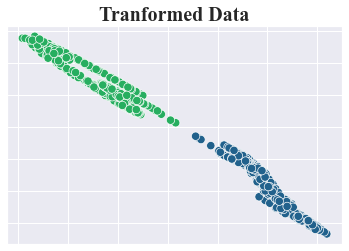

In [219]:
input_size = 2
hidden_size = 400
total_epochs = 300
model = NeuralNetwork(input_size, hidden_size, classes=2)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

for epoch in range(total_epochs):

    outputs = model(X)
    loss = criterion(outputs, y)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    acc = accuracy(outputs, y)
    if epoch%50 == 0:
        print(f"{epoch = }, {acc =}")

## get output of last hidden layer
x = F.relu(model.fc1(X))
x = F.relu(model.fc2(x))
x = (model.fc3(x)).detach().numpy()

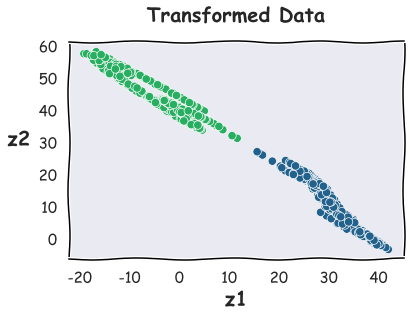

In [240]:
with plt.xkcd():    
    ax_ = sns.scatterplot(x[:, 0], x[:, 1], c=[selected[int(label)] for label in y], s = 70, )
    plt.xlabel("z1", fontweight = "bold", size = 20)
    plt.xticks(size = 15)
    plt.ylabel("z2", fontweight = "bold", size = 20, rotation = 0, labelpad = 20)
    plt.yticks(size = 15)
    plt.title("Transformed Data", fontweight = "bold", size = 20, pad =20)
    
    plt.show()